In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


ham = pd.read_csv("./data/results/ham.csv")
ham.insert(0,"file","sms_ham",True)

spam = pd.read_csv("./data/results/spam.csv")
spam.insert(0,"file","sms_spam",True)

nlkt = pd.read_csv("./data/results/nltkCorpus.csv")
nlkt.insert(0,"file","nltk",True)

reuters = pd.read_csv("./data/results/reuters.csv")
reuters.insert(0,"file","reuters",True)

news = pd.read_csv("./data/results/news.csv")
news.insert(0,"file","news",True)

deceptive_reviews = pd.read_csv("./data/results/deceptive_reviews.csv")
deceptive_reviews.insert(0,"file","deceptive_reviews",True)

trutful_reviews = pd.read_csv("./data/results/trutful_reviews.csv")
trutful_reviews.insert(0,"file","trutful_reviews",True)

tweets = pd.read_csv("./data/results/tweets.csv")
tweets.insert(0,"file","tweets",True)

state_of_the_union_address = pd.read_csv("./data/results/state_of_the_union_address.csv")
state_of_the_union_address.insert(0,"file","STOU",True)

df = nlkt.append(news, ignore_index = True)
df = df.append(reuters, ignore_index = True)
df = df.append(state_of_the_union_address, ignore_index = True)
df = df.append(deceptive_reviews, ignore_index = True)
df = df.append(trutful_reviews, ignore_index = True)
df = df.append(tweets, ignore_index = True)
df = df.append(ham, ignore_index = True)
df = df.append(spam, ignore_index = True)




C:\Users\lbiondo\AppData\Local\Temp\ipykernel_199660\2077805889.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = nlkt.append(news, ignore_index = True)
C:\Users\lbiondo\AppData\Local\Temp\ipykernel_199660\2077805889.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(reuters, ignore_index = True)
C:\Users\lbiondo\AppData\Local\Temp\ipykernel_199660\2077805889.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(state_of_the_union_address, ignore_index = True)
C:\Users\lbiondo\AppData\Local\Temp\ipykernel_199660\2077805889.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(deceptiv

In [2]:
df

,file,parsable,confidence_tokenizer,confidence_pos,confidence_ner,confidence_chunker,spelling_mistakes,avg_sentence_len,lexical_diversity,recognized_by_pos,acronyms,present_in_dictionary,readability_cli,readability_ari,test_avg_sentence_len,test_ari,test_cli
0,nltk,98.814070,99.032663,92.731658,97.240201,95.789447,97.943216,72.729648,63.233668,99.993970,99.407035,95.517588,33.727035,8.336784,12.661682,16.747739,12.981005
1,news,96.352625,98.324940,91.167303,98.733055,93.974821,97.013604,63.045382,64.897494,99.967542,98.783174,91.498926,32.394451,1.544881,19.526209,56.579236,13.170740
2,reuters,89.016935,88.388849,74.008565,87.345829,82.172812,94.921672,61.494075,67.791537,99.979431,91.032543,90.329227,42.317623,6.824212,16.981517,16.973026,11.756305
3,STOU,97.244053,99.611454,90.463436,99.291189,91.081498,99.529075,33.360661,26.921586,99.966960,99.880617,99.457269,37.929515,3.736344,26.652513,28.003084,12.304626
4,deceptive_reviews,97.746250,99.529750,92.959875,99.423625,94.009625,98.911875,77.663613,68.404000,99.990000,99.808125,97.807000,70.560500,66.130288,16.318313,8.387375,7.410188
5,trutful_reviews,97.624250,99.253750,92.014125,99.404375,93.139625,98.540375,76.159488,69.700000,99.972875,99.665750,97.152375,70.283250,65.144800,15.044523,9.057375,7.452075
6,tweets,97.502480,97.722660,82.918860,98.890440,87.615400,95.743280,47.744710,95.827220,99.917120,99.023240,90.273000,73.620808,72.233804,8.414272,5.427560,5.117892
7,sms_ham,97.916649,97.026816,80.668134,98.458660,87.940408,94.797876,43.206345,94.817754,99.521396,98.422458,87.147236,75.989378,76.575996,7.596000,3.310774,2.979174
8,sms_spam,98.449264,97.256091,75.252477,96.940830,88.437216,95.880187,44.776238,95.155288,99.907229,94.413922,84.011245,58.668969,60.550495,8.934873,8.722758,9.321633


In [3]:
df_reduced = df.copy(deep=True)
cols = list(df_reduced.columns)
df_reduced[cols[1:]] = np.trunc(10 * df_reduced[cols[1:]]) / 10
df_reduced = df_reduced[cols[0:12]+ cols[14:17]]
df_reduced.to_csv("reduced.csv",index=False)
df_reduced

,file,parsable,confidence_tokenizer,confidence_pos,confidence_ner,confidence_chunker,spelling_mistakes,avg_sentence_len,lexical_diversity,recognized_by_pos,acronyms,present_in_dictionary,test_avg_sentence_len,test_ari,test_cli
0,nltk,98.8,99.0,92.7,97.2,95.7,97.9,72.7,63.2,99.9,99.4,95.5,12.6,16.7,12.9
1,news,96.3,98.3,91.1,98.7,93.9,97.0,63.0,64.8,99.9,98.7,91.4,19.5,56.5,13.1
2,reuters,89.0,88.3,74.0,87.3,82.1,94.9,61.4,67.7,99.9,91.0,90.3,16.9,16.9,11.7
3,STOU,97.2,99.6,90.4,99.2,91.0,99.5,33.3,26.9,99.9,99.8,99.4,26.6,28.0,12.3
4,deceptive_reviews,97.7,99.5,92.9,99.4,94.0,98.9,77.6,68.4,99.9,99.8,97.8,16.3,8.3,7.4
5,trutful_reviews,97.6,99.2,92.0,99.4,93.1,98.5,76.1,69.6,99.9,99.6,97.1,15.0,9.0,7.4
6,tweets,97.5,97.7,82.9,98.8,87.6,95.7,47.7,95.8,99.9,99.0,90.2,8.4,5.4,5.1
7,sms_ham,97.9,97.0,80.6,98.4,87.9,94.7,43.2,94.8,99.5,98.4,87.1,7.5,3.3,2.9
8,sms_spam,98.4,97.2,75.2,96.9,88.4,95.8,44.7,95.1,99.9,94.4,84.0,8.9,8.7,9.3


In [4]:
with open("./reduced.csv", "r") as f:
    with open("./out.txt","w") as out:
        lines = f.readlines()
        for line in lines:
            line = re.sub(",", "&", line)
            line = re.sub("\n", " \\\\\ \n", line)
            line = re.sub("_", " ", line)
            out.write(line)

In [5]:
df_final = df.copy(deep=True)



df_final["confidence"] = df_final.iloc[:,2:6].mean(axis=1)
cols = list(df_final.columns)
df_final[cols[1:]] = np.trunc(10 * df_final[cols[1:]]) / 10
df_final = df_final[cols[0:2] + [cols[-1]] + cols[6:14]]
df_final.to_csv("final.txt",index=False)
df_final


,file,parsable,confidence,spelling_mistakes,avg_sentence_len,lexical_diversity,recognized_by_pos,acronyms,present_in_dictionary,readability_cli,readability_ari
0,nltk,98.8,96.1,97.9,72.7,63.2,99.9,99.4,95.5,33.7,8.3
1,news,96.3,95.5,97.0,63.0,64.8,99.9,98.7,91.4,32.3,1.5
2,reuters,89.0,82.9,94.9,61.4,67.7,99.9,91.0,90.3,42.3,6.8
3,STOU,97.2,95.1,99.5,33.3,26.9,99.9,99.8,99.4,37.9,3.7
4,deceptive_reviews,97.7,96.4,98.9,77.6,68.4,99.9,99.8,97.8,70.5,66.1
5,trutful_reviews,97.6,95.9,98.5,76.1,69.6,99.9,99.6,97.1,70.2,65.1
6,tweets,97.5,91.7,95.7,47.7,95.8,99.9,99.0,90.2,73.6,72.2
7,sms_ham,97.9,91.0,94.7,43.2,94.8,99.5,98.4,87.1,75.9,76.5
8,sms_spam,98.4,89.4,95.8,44.7,95.1,99.9,94.4,84.0,58.6,60.5


In [6]:
with open("./final.txt", "r") as f:
    with open("./out.txt","w") as out:
        lines = f.readlines()
        for line in lines:
            line = re.sub(",", "&", line)
            line = re.sub("\n", " \\\\\ \n", line)
            line = re.sub("_", " ", line)
            out.write(line)

In [ ]:
for col in df_final.columns[1:]:
    ax =df_final.sort_values(col).plot.bar(x="file", y= col, xlabel = "")
    for i, each in enumerate(df_final.sort_values(col).index):
        y = df_final.loc[each][col]
        ax.text(i, y, y)

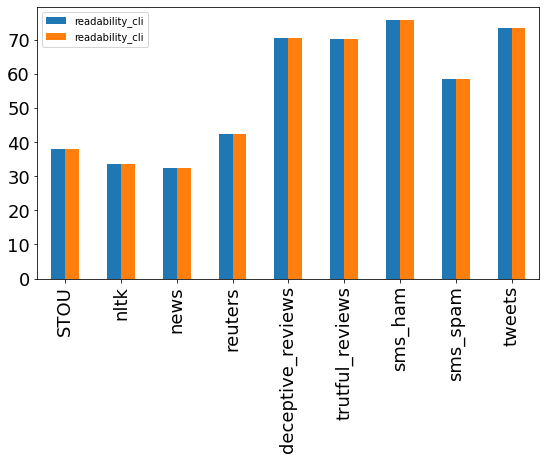

In [8]:
df_final.sort_values("lexical_diversity").plot.bar(x="file", y=["readability_cli","readability_cli"],xlabel = "", figsize = (9,5),fontsize= 18)
plt.savefig("readability", bbox_inches="tight")

In [95]:
df_comp =df_final.copy(deep=True)

df_comp = df_comp.T
df_comp.reset_index(inplace=True)
df_comp.columns = ["file",	"nltk"	,"news",	"reuters",	"STOU",	"deceptive_reviews",	"trutful_reviews",	"tweets",	"sms_ham",	"sms_spam"]
df_comp = df_comp.iloc[1:,:]
df_comp = df_comp[["file","sms_ham","sms_spam","deceptive_reviews",	"trutful_reviews"]]
df_comp

,file,sms_ham,sms_spam,deceptive_reviews,trutful_reviews
1,parsable,97.9,98.4,97.7,97.6
2,confidence,91.0,89.4,96.4,95.9
3,spelling_mistakes,94.7,95.8,98.9,98.5
4,avg_sentence_len,43.2,44.7,77.6,76.1
5,lexical_diversity,94.8,95.1,68.4,69.6
6,recognized_by_pos,99.5,99.9,99.9,99.9
7,acronyms,98.4,94.4,99.8,99.6
8,present_in_dictionary,87.1,84.0,97.8,97.1
9,readability_cli,75.9,58.6,70.5,70.2
10,readability_ari,76.5,60.5,66.1,65.1


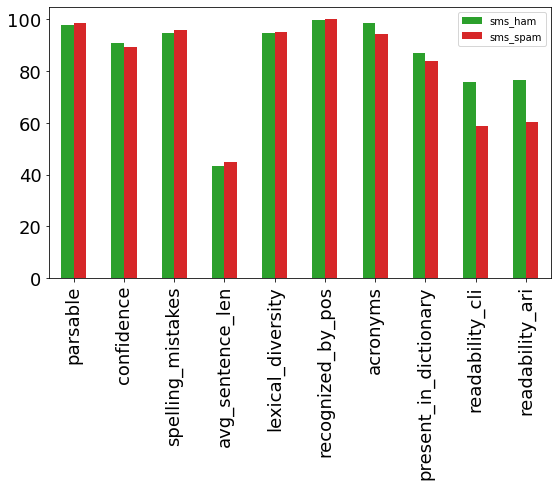

In [104]:
df_comp.plot.bar(x="file", xlabel = "",y=["sms_ham","sms_spam"], figsize = (9,5),fontsize= 18,color=['C2', 'C3'])
plt.savefig("sms_comparison", bbox_inches="tight")

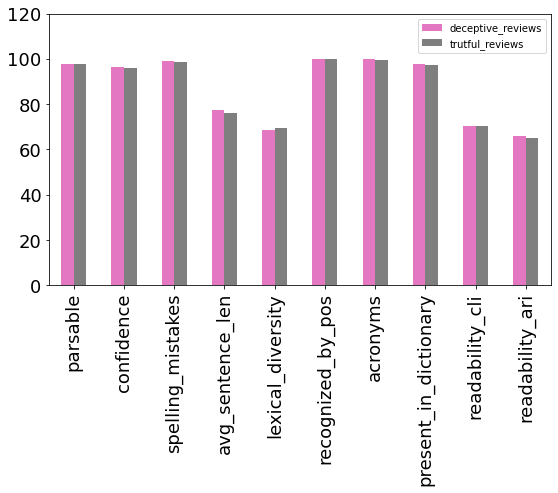

In [106]:
df_comp.plot.bar(x="file", xlabel = "",y=["deceptive_reviews",	"trutful_reviews"], ylim= (0,120),figsize = (9,5),fontsize= 18,color=['C6', 'C7'])
plt.savefig("reviews_comparison", bbox_inches="tight")

<AxesSubplot:>

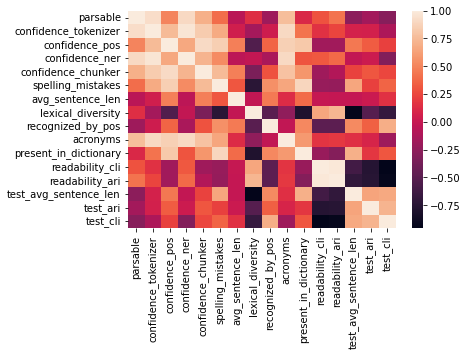

In [11]:
import seaborn as sns
%matplotlib inline



# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)